# PHYS 641 Assignment 4
### Andrew V. Zwaniga (260843983) 
#### Due October 24 2018 

## Problem 1: Converting maps of the CMB 

### Part A: Expected variance of the CMB map 

#### Preamble

The __cosmic microwave background__ (CMB) is radiation that was produced at the moment when the universe became opaque to photons (before this time, according to the standard cosmological model, photons were scattering from electrons far too often to escape this process). These photons that were produced at the _time of last scattering_ then travelled freely through the universe. Due to expansion of the universe, today we observe these photons everywhere on the sky with a characteristic temperature of $T_{\text{CMB}} \approx 2.7~\text{K}$. 

If the sky is assumed to be approximately a blackbody in every direction, then the peak wavelength corresponding to this temperature is $\lambda_{\text{max}} \approx 931~\text{m}$ or $\nu_{\text{max}} \approx 320~\text{kHz}$. In connection with the temperature of the universe just before last-scattering (~400,000 years after the Big Bang), the explanation for the microwave frequency is that the universe has expanded enough since that time to stretch the wavelength of the photons as they propogate. 

When we observe the CMB radiation - with COBE, WMAP, or (more topically) Planck - we plot a map of the sky in some projection of a spherical surface to a plane that shows the temperature at each point in the sky (points become cells with finite angular resolution). We find fluctuations in this temperature (owing to cosmological reasons, such as baryonic acoustic oscillations) that can be modelled with the spherical harmonic functions. These are functions $Y_{l}^{m}(\theta, \phi)$ that satisfy a slew of mathematically interesting identities, but mainly are useful because they can be used to decompose a function into values on the unit sphere in $\mathbb{R}^{3}$. They are orthogonal in the following sense: 

$ \int_{0}^{2\pi}\int_{0}^{\pi}(Y_{l}^{m})^{*}Y_{l'}^{m'}\sin(\theta)d\theta d\phi = \delta_{ll'}\delta_{mm'}$.

Here, $\phi$ is the azimuthal angle and $\theta$ is the polar angle. The functional form is the associated Legendre polynomials multiplied by an azimuthal wave, 

$ Y_{l}^{m}(\theta,\phi) = \sqrt{\frac{(2l+1)}{4\pi}\frac{(l-m)!}{(l+m)!}}\exp(im\phi)P_{l}^{m}(\cos(\theta)),~~~~~~ m \geq 0$

and $Y_{l}^{-m} = (-1)^{m}(Y_{l}^{m})^{*}$.

#### A look at the power spectrum in `example_ps.txt`

In the code below, we read in the file `example_ps.txt`, assuming that the first column of the file contains values for $\mathcal{C}_{l}$. To obtain the power spectrum we calculate $\langle a_{lm}^{2} \rangle = C_{l} = \frac{2\pi}{l(l+1)}\mathcal{C}_{l}$. The temperature map $T(\theta, \phi)$ is a sum over spherical harmonics $Y_{l}^{m}(\theta, \phi)$ with coefficients determined by $a_{lm}$. The expectation is $\langle a_{lm} \rangle = 0$ since we assume Gaussian fluctuations. The expected variance of $T$ from data for $\mathcal(C)_{l}$ is 

$ \text{Var}[T] = \langle T^{2} \rangle - (\langle T \rangle)^{2} $

The second term vanishes by the Gaussian assumption. So we calculate $\langle T^{2} \rangle$: 

$\langle T^{2} \rangle = \langle \Big{(}\sum_{l=0}^{l_{\text{max}}}\sum_{m=-l}^{l}a_{lm}Y_{l}^{m}\Big{)}^{2}\rangle $

$ = \sum_{l=0}^{l_{\text{max}}}\sum_{m=-l}^{l}\langle a_{lm}^{2} \rangle\|Y_{l}^{m}\|^{2}$ 

By assumption, $a_{lm}$'s are uncorrelated and the normalizations are chosen properly so that we can write 

$ = \frac{\langle C_{l} \rangle}{4\pi} \sum_{l=0}^{l_{\text{max}}}\sum_{m=-l}^{l}1$

$ = \frac{\langle C_{l} \rangle}{4\pi} \sum_{l=0}^{l_{\text{max}}}(2l+1) $ 

$ = \frac{\langle C_{l} \rangle}{4\pi}[l_{\text{max}}(l_{\text{max}}+1)+1] $

$ = \frac{l_{\text{max}}(l_{max}+1)+1}{4\pi} \langle \frac{2\pi}{l(l+1)}\mathcal{C}_{l} \rangle $

$\boxed{\text{Var}[T] = \frac{l_{\text{max}}(l_{max}+1)+1}{2} \Big{\langle} \frac{\mathcal{C}_{l}}{l(l+1)} \Big{\rangle}}$. 

Note $l_{\text{max}}$ is just the largest $l$ value we sum up to - since computers can only handle finitely many coefficients in any expansion. 

The expected variance is 1250544.6604441102.
No idea what the units are because the units in the data file are not specified. Could be mK^2 I guess.


<Figure size 432x288 with 0 Axes>

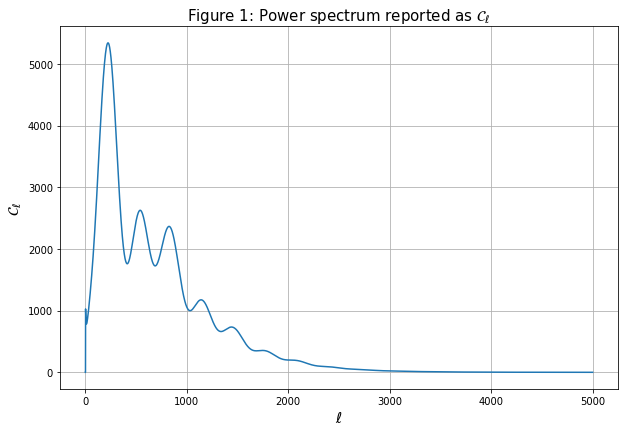

In [160]:
## Problem 1: Part A 

# Let's check what the variance should be 

import numpy as np
import healpy as hp
import math

pi = math.pi

from matplotlib import pyplot as plt

skymap = hp.alm2map

file = open('example_ps.txt')
data = np.loadtxt(file, usecols=0) 

scriptC = data 
lmax    = len(data)
C       = np.zeros(lmax)
L       = np.arange(lmax)

for l in range(lmax):
    if l == 0: 
        C[l] = 0
    else: 
        C[l] = 2*pi*scriptC[l]/(l*(l+1))
        #C[l] = scriptC[l]/(l*(l+1))

varT = (lmax*(lmax+1)+1)/(4*pi)*np.average(C)
#varT = (lmax+1)**2/(2)*np.average(C)
    
print('The expected variance is ' + str(varT) + '.')
print('No idea what the units are because the units in the data file are not specified. Could be mK^2 I guess.')

plt.figure(1)
plt.figure(figsize=(10,20/3))
plt.title('Figure 1: Power spectrum reported as $\mathcal{C}_{\ell}$', size=15)
plt.xlabel('$\ell$', size=15)
plt.ylabel('$\mathcal{C}_{\ell}$', size=15)
plt.grid()
plt.plot(L, scriptC)


#### Part B: Making a temperature map of the sky from power spectrum data 

Given the data in `example_ps.txt` we can generate a (fake) set of coefficients $a_{lm}'$ which will really only depend on $l$ and we will have no way of knowing the coefficients for corresponding $m$-modes. For each $l$, pull a random number from a Gaussian distribution with mean $\mu_{l}' = \langle a_{lm} \rangle = 0$ and standard deviation $ \sigma_{l}' = \sqrt{\text{Var}[a_{lm}]} = \sqrt{\langle a_{lm}^{2} \rangle - (\langle a_{lm} \rangle)^{2}} = \sqrt{\frac{2\pi}{l(l+1)}\mathcal{C}_{l}} = \sqrt{C_{l}}$. 



Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Variance in the generated map is 163.15117553309838


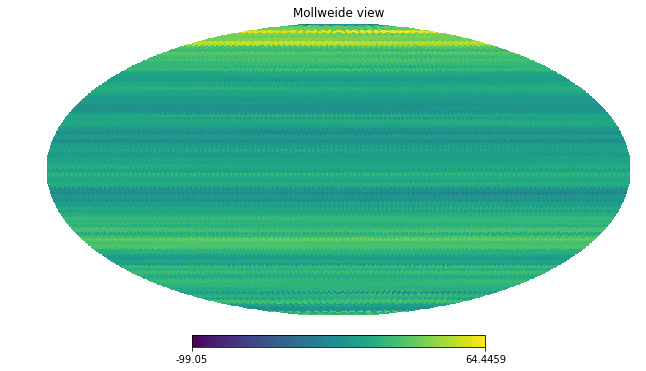

In [157]:
## Problem 1: Part B

import numpy as np 
import math 

import healpy as hp

from matplotlib import pyplot as plt
from pylab import *

pi = math.pi 

ll = 1000
mm = int(ll) 

n = int(mm*(2*ll+1-mm)/2 + ll + 1)

alm_gen = np.zeros(n, dtype='complex')

for l in range(ll):
    #print('--- l = ' + str(l) + ' ---')
    for m in range(l+1):
        #print('          ~~~ m = ' + str(m) + ' ~~~')
        if m == 0: 
            # Ensures that the m=0 terms are zero, supposed to remove azimuthal symmetry 
            alm_gen[l+m] = np.random.normal(scale=np.sqrt(C[l]))
            #print('{:>25.2f}'.format(alm_gen[l+m]))
        else: 
            # The other m terms are complex in general 
            alm_gen[l+m] = np.random.normal(scale=np.sqrt(C[l])) + 1.J*np.random.normal(scale=np.sqrt(C[l]))
            #print('{:>25.2f}'.format(alm_gen[l+m]))
    
# Now, use HealPy to generate a map of the sky 

skymap     = hp.alm2map(alm_gen, nside=32, lmax=ll, mmax=mm)
var_skymap = (np.std(skymap))**2

hp.mollview(skymap)

print('Variance in the generated map is ' + str(var_skymap))

### Part C: Comparing the input and generated power spectra

Using `healpy.anafast(map)` we can convert the sky map back into $a_{lm}$'s and compare with the original input data. 

They don't compare very well, I am sure that I haven't done this correct. Firstly, the skymap has horizontal stripes which means there is azimuthal symmetry, so $a_{lm}'=a_{l(-m)}'$. Secondly, the variance doesn't agree at all with the input variance. But I also don't trust that derivation I did, I don't understand what $\langle a_{lm} \rangle$ means. Is it an average over $m$'s? It isn't clear. There is a lot of abuse of notation, because $\langle T \rangle$ means an averaging over the sphere. But $\langle a_{lm} \rangle$ means a different kind of average because these have no dependence on $\theta, \phi$. What kind of average, I don't know. 

96
(96,)


<Figure size 432x288 with 0 Axes>

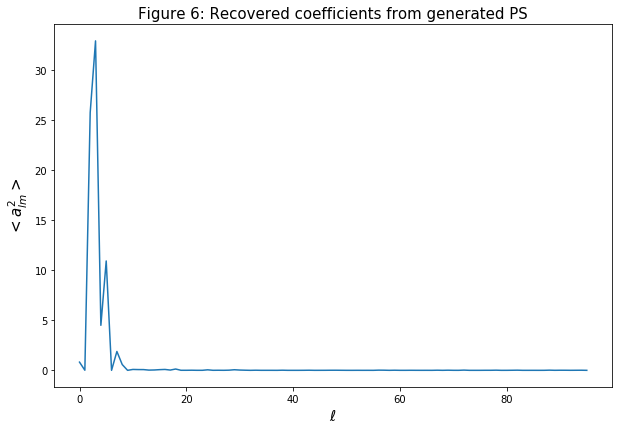

In [119]:
## Problem 1: Part C 

recovered_alm2 = hp.anafast(skymap)
print(recovered_alm2.size)
print(recovered_alm2.shape)

plt.figure(1)
plt.figure(figsize=(10,20/3))
plt.title('Figure 6: Recovered coefficients from generated PS', size=15)
plt.xlabel('$\ell$', size=15)
plt.ylabel('$<a_{lm}^{2}>$', size=15)
plt.plot(recovered_alm2)

### Part d: Generating coefficients using `healpy.synalm` and `healpy.synfast` 

For the use of `healpy.synalm`, generate a random vector containing values for $C_{l}$. The function returns a set of $a_{lm}$. Then use `healpy.alm2sky` to get a corresponding map. Then use `healpy.anafast` to get $a_{lm}'$ and compare with $a_{lm}$. Hopefully they are similar but who knows. 

/anaconda3/lib/python3.6/site-packages/healpy/sphtfunc.py:295: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning)


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


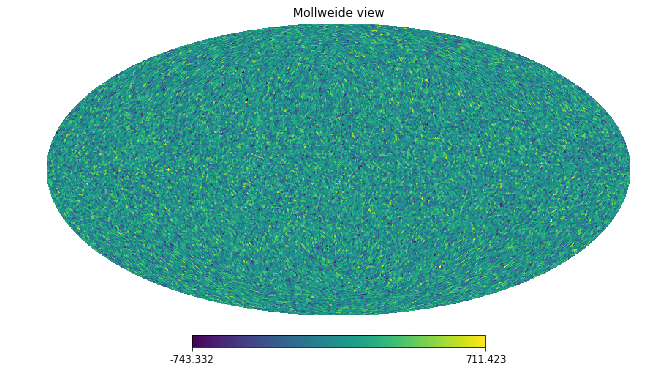

In [148]:
import numpy as np
import healpy as hp
import math

from matplotlib import pyplot

lmax = 1000

C = np.zeros(lmax)

for l in range(lmax):
    # random numbers, should look like white noise 
    C[l] = np.random.normal(scale=1)
    #print('l = ' + str(l) + ' C[l] = ' + str(C[l]))
    
alm = hp.synalm(C)

sky = hp.alm2map(alm, nside=64)

hp.mollview(sky)

rec_alm = hp.anafast(sky) # recover alm 

L = np.arange(len(alm))


Looks like white noise, which is what I expected.

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


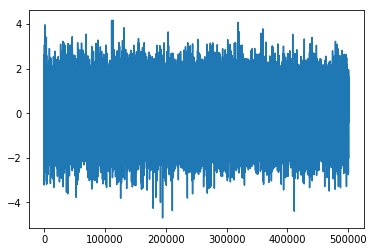

In [154]:
plt.ion()
plt.clf()
plt.figure(1)
plt.plot(L, alm)
    

<Figure size 432x288 with 0 Axes>

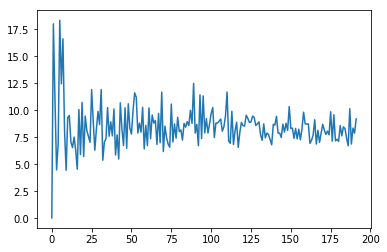

In [150]:
rec_L = np.arange(len(rec_alm))

plt.ion()
plt.clf()
plt.figure(2)
plt.plot(rec_L, rec_alm)
    

They don't look anything alike. I really don't understand what `healpy` even does when it returns these arrays. For example why is `rec_alm` only 200 entries long but `alm` is 500,000 entries long? I think they ought to return 2D arrays, with format `[l][m]`. Their `help()` files in interactive Python don't help much, they basically tell you nothing about what format is returned :( 



## Problem 2: Flat sky region 

### Part A: Conversion between $k$ and $l$ 

The discrete Fourier transform of a discrete bounded and continuous function $f: \mathbb{R}^{2} \to \mathbb{R}$ is

$ F(k_{x}, k_{y}) = \sum_{k_{x}=0}^{k_{x,\text{max}}}\sum_{k_{y}=0}^{k_{y,\text{max}}}f(x,y)\exp\Big{[}-2\pi i\Big{(}\frac{k_{x}x}{N}+\frac{k_{y}y}{M}\Big{)}\Big{]} $

A region on the sky of angular dimensions 20 by 20 degrees, or $\frac{\pi}{9}$ by $\frac{\pi}{9}$ radians, can be viewed as a Euclidean surface in $\mathbb{R}^{2}$. Then a wave living in $\mathbb{R}^{2}$ can fit one wavelength parallel to a side of the box if its wavelength is $\frac{\pi}{9}$. Note that $\sin(\frac{2\pi kx}{N})$ and $\cos(\frac{2\pi kx}{N})$ can fit exactly one wavelength on $[0,N/k]$. 

Roughly, the conversion between $l$ (from spherical harmonic decomposition of $f$) and $k$ (from Euclidean harmonic decomposition of $f$) is 

$ l \approx \frac{2\pi k}{d}$

where $d$ is the width of the planar region. So if $d = \frac{\pi}{9} $ then $ l \approx 18k$. This would mean that if this box is located along the equator, the spherical harmonic $Y_{l}^{l}$ which has $l$ periods across the equator will have 1 wavelength across the box when the Euclidean harmonic has 18 wavelengths across the box. Thus the smallest $l$ you should go to would be $18k$ for whatever $k$ is. 

### Part B: 

Given $l_{\text{max}}$, the number of coefficients is 

$ \sum_{l=0}^{l_{\text{max}}}\sum_{m=-l}^{l}1 = \sum_{l=0}^{l_{\text{max}}}(2l+1) = 2\sum_{l=0}^{l_{\text{max}}}l +1 = 2[\frac{1}{2}l_{\text{max}}(l_{\text{max}}+1)]+1 = l_{\text{maz}}(l_{\text{max}}+1)+1$ 

The rough correspondance predicts that $k_{\text{max}} = \frac{l}{18}$. 

In [182]:
lmax = 666

no_alms = lmax*(lmax+1)+1

kmax = int(lmax/18)

no_kmodes = kmax 

print('For lmax = ' + str(lmax) + ', number of alms is ' + str(no_alms) + '. Number of k modes is ' + str(kmax))

For lmax = 666, number of alms is 444223. Number of k modes is 37


The spherical harmonic decomposition of the temperature is 

$ T = \sum_{l=0}^{l_{\text{max}}}\sum_{m=-l}^{l}a_{lm}Y_{l}^{m}$ 

so the power spectrum is 

$ \langle T^{*}T \rangle = \int_{0}^{2\pi}\int_{0}^{\pi}\Big{[}\sum_{l=0}^{l_{\text{max}}}\sum_{m=-l}^{l}a_{lm}Y_{l}^{m}\Big{]}^{*}\Big{[}\sum_{l=0}^{l_{\text{max}}}\sum_{m=-l}^{l}a_{lm}Y_{l}^{m}\Big{]}\sin(\theta)d\theta d\phi$ 

$ \langle T^{*}T \rangle = \int_{0}^{2\pi}\int_{0}^{\pi}\Big{[}\sum_{l=0}^{l_{\text{max}}}\sum_{m=-l}^{l}a_{lm}^{*}(Y_{l}^{m})^{*}\Big{]}\Big{[}\sum_{l=0}^{l_{\text{max}}}\sum_{m=-l}^{l}a_{lm}Y_{l}^{m}\Big{]}\sin(\theta)d\theta d\phi$ 

$ \langle T^{*}T \rangle =?~\|a_{lm}\|^{2}$ 

For the flat-sky, you would have to patch together a bunch of small pieces on which the regular Fourier decomposition holds. On each patch you would do a Fourier transform of the temperature over its local domain within that patch. The $k_{\text{max}}$ for this should be $\approx \frac{dl_{max}}{2\pi}$ on each patch.

$ \mathcal{T}(k_{x}, k_{y}) = \sum_{k_{x}=0}^{k_{x,\text{max}}}\sum_{k_{y}=0}^{k_{y,\text{max}}}T(x,y)\exp\Big{[}-2\pi i\Big{(}\frac{k_{x}x}{N}+\frac{k_{y}y}{M}\Big{)}\Big{]} $

To get $k_{x,\text{max}}$ and $k_{y,\text{max}}$ you need to use $k = \sqrt{k_{x,\text{max}}^{2}+k_{y,\text{max}}}$. If the local patch is a square then $k_{x,\text{max}} = k_{y,\text{max}} = \frac{k_{\text{max}}}{\sqrt{2}}$ works.

### Part C: 

Given $l_{\text{max}} = 5000$ the max is $k_{\text{max}} = 5000/18 \approx 277$ so the max pixel size is $360/277 \approx 1.29$ degrees. If we pick a much larger value of $k$ then we'll have smaller pixel size. 

Variance is 0.05939089195235228


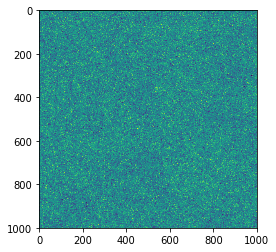

In [216]:
import numpy as np 
import healpy 
import math 

from matplotlib import pyplot as plt

n = lmax/18

x = np.arange(n)

x[int(n/2):] = x[int(n/2):] - n 

data    = np.random.randn(n, n)
ft_data = np.fft.fft2(data)

k = np.arange(len(ft_data)) + 0.0

kx = np.repeat([x], n, axis=0)
ky = np.transpose(kx)

k = np.sqrt(kx**2 + ky**2)

k[0, 0] = 0.5

pk = k**(-1)

ift_ft_data = np.real(np.fft.ifft2(ft_data*np.sqrt(pk)))

plt.imshow(ift_ft_data)

print('Variance is ' + str(np.std(ift_ft_data)))

I don't understand how to do this with the results from problem 1. 

### Problem 3 

#### Part A 

The Planck function for wavelength $\lambda$ and temperature $T$ is 

$ P(\lambda, T) = \frac{2hc^{2}\lambda^{-5}}{\exp\Big{(}\frac{hc}{\lambda kT}\Big{)}-1}$ 

with units of $ \text{erg}\cdot\text{s}^{-1}\cdot\text{cm}^{-2}\cdot\text{Hz}^{-1}\cdot\text{sr}^{-1} $ 

Typical CMB detectors have a collecting area of $\lambda^{2}$ and see a solid angle of 1 sr. If the temperature of the CMB is $T = 2.725~\text{K}$, find the number of erg/s/Hz hitting the detector. 

The answer is $ P(T=T_{\text{CMB}}) \cdot A \cdot \Omega$ for collecting area $A$ and solid angle $\Omega$. The peak wavelength is found from Wien's displacement law: 

$ \lambda_{\text{max}} = \frac{0.0029~\text{m}\cdot\text{K}}{T_{\text{CMB}}} = 0.00106~\text{m}$

In [237]:
lammax = 0.0029/2.725
print(lammax)

0.0010642201834862384


In [254]:
import numpy as np

T = 2.735 # K 

h = 6.626e-34 # Js 
k = 1.38e-23 # J/K 
c = 3e8 # m/s

A = lammax**2 
W = 1 # sr 

P = (2*h*c**2*lammax**(-5))/(np.exp((h*c)/(lammax*k*T))-1)
answer = P*A*W
print(str(answer) + ' J/s/Hz')
print(str(answer*1e7) + ' erg/s/Hz')

7.067398568672941e-10 J/s/Hz
0.007067398568672941 erg/s/Hz


#### Part B 

30 GHz bandwidth for 150 GHz detector. Photon energy is $h\nu$ for a frequency $\nu$. 

In [252]:
b   = 30 # GHz 
nom = 150 # GHz 

low = nom - b/2
hi  = nom + b/2 

e_low = h*low 
e_hi  = h*hi 

print('Low end ' + str(answer*low/e_low) + ' photons/s')
print('High end ' + str(answer*hi/e_hi) + ' photons/s')

Low end 1.0666161437779869e+24 photons/s
High end 1.066616143777987e+24 photons/s


Continuous regime

#### Part C

In [260]:
print('Noise = ' + str(1e6*1/np.sqrt(b*1e9*1)) + ' uK')

Noise = 5.773502691896257 uK


It's 10 times better. At some point improving detectors will result in trying to account for thermal noise from the telescope itself which will be unavoidable I think unless the telescope is kept very cold in probably the mK or uK temperature range. I think that's pretty difficult today but not certain about the current limits in low temperature technology. 